In [1]:
!pip install publicsuffixlist

In [2]:
import pandas as pd
import re
from publicsuffixlist import PublicSuffixList
df=pd.read_csv("data//mixed_domain.csv")

In [3]:
df.head() # this will print first 5 rows of dataset

,DGA_family,Domain,Type
0,banjori,vrxhererwyatanb.com,DGA
1,banjori,rjdwmachuslazaroqok.com,DGA
2,none,mte.gov.br,Normal
3,none,animefangirl00.tumblr.com,Normal
4,none,seacenter.ir,Normal


In [4]:
psl = PublicSuffixList()

In [5]:
def domain_length(domain):
  # Generate Domain Name Length (DNL)
  return len(domain)



In [6]:
def subdomains_number(domain):
  # Generate Number of Subdomains (NoS)
  subdomain = ignoreVPS(domain)
     # Return the rest of domain after ignoring the Valid Public Suffixes:
  return (subdomain.count('.') + 1)



In [7]:
def subdomain_length_mean(domain):
  # Generate Subdomain Length Mean (SLM) 
  subdomain = ignoreVPS(domain)
  result = (len(subdomain) - subdomain.count('.')) / (subdomain.count('.') + 1)
  return result



In [8]:
def has_www_prefix(domain):
  # Generate Has www Prefix (HwP)
  if domain.split('.')[0] == 'www':
    return 1
  else:
    return 0

In [9]:
def underscore_ratio(domain):
  # Generate Underscore Ratio (UR) on dataset
  subString = ignoreVPS(domain)
  result = subString.count('_') / (len(subString) - subString.count('.'))
  return result

In [10]:
def ignoreVPS(domain):
    # Return the rest of domain after ignoring the Valid Public Suffixes:
    validPublicSuffix = '.' + psl.publicsuffix(domain)
    if len(validPublicSuffix) < len(domain):
         # If it has VPS
        subString = domain[0: domain.index(validPublicSuffix)]  
    elif len(validPublicSuffix) == len(domain):
        return 0
    else:
        # If not
        subString = domain
    
    return subString


In [11]:
def contains_digit(domain):
  """
   Contains Digits 

  """
  subdomain = ignoreVPS(domain)
  for item in subdomain:
    if item.isdigit():
      return 1
  return 0



In [12]:
def vowel_ratio(domain):
  """
  calculate Vowel Ratio 
  """
  VOWELS = set('aeiou')
  v_counter = 0
  a_counter = 0
  subdomain = ignoreVPS(domain)
  for item in subdomain:
    if item.isalpha():
      a_counter+=1
      if item in VOWELS:
        v_counter+=1
  if a_counter>1:
    ratio = v_counter/a_counter
    return ratio



In [13]:
def contains_IP_address(domain):
  # Generate Contains IP Address (CIPA) on datasetx
    splitSet = domain.split('.')
    for element in splitSet:
        if(re.match("\d+", element)) == None:
            return 0
    return 1  

In [14]:
def digit_ratio(domain):
  """
  calculate digit ratio
  """
  d_counter = 0
  counter = 0
  subdomain = ignoreVPS(domain)
  for item in subdomain:
    if item.isalpha() or item.isdigit():
      counter+=1
      if item.isdigit():
        d_counter+=1
  if counter>1:
    ratio = d_counter/counter
    return ratio

In [18]:
def extract_features():
  df['DNL'] = df['Domain'].apply(lambda x: domain_length(x)) #this will call to domain length function
  df['HwP'] = df['Domain'].apply(lambda x: has_www_prefix(x)) # has www domain 
  df['CIPA'] = df['Domain'].apply(lambda x: contains_IP_address(x)) #generate contains ip domain
  df['contains_digit']= df['Domain'].apply(lambda x:contains_digit(x))
  df['vowel_ratio']= df['Domain'].apply(lambda x:vowel_ratio(x))
  df['digit_ratio']= df['Domain'].apply(lambda x:digit_ratio(x))
 
  #df['Entropy']= df['Domain'].apply(lambda x:prc_entropy(x))

In [16]:
extract_features()

In [17]:
df

,DGA_family,Domain,Type,DNL,HwP,CIPA,contains_digit,vowel_ratio,digit_ratio
0,banjori,vrxhererwyatanb.com,DGA,19,0,0,0,0.266667,0.0
1,banjori,rjdwmachuslazaroqok.com,DGA,23,0,0,0,0.315789,0.0
2,none,mte.gov.br,Normal,10,0,0,0,0.333333,0.0
3,none,animefangirl00.tumblr.com,Normal,25,0,0,1,0.333333,0.1
4,none,seacenter.ir,Normal,12,0,0,0,0.444444,0.0
...,...,...,...,...,...,...,...,...,...
2458858,banjori,ykhtsikathrinezad.com,DGA,21,0,0,0,0.294118,0.0
2458859,banjori,htltrasildeafeninguvuc.com,DGA,26,0,0,0,0.363636,0.0
2458860,qakbot,iuaapokyvcrzynkisofpm.org,DGA,25,0,0,0,0.333333,0.0
2458861,banjori,lhfnellefrictionlessv.com,DGA,25,0,0,0,0.285714,0.0


In [19]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df['DGA_family']= label_encoder.fit_transform(df['DGA_family']) 
df['Domain']= label_encoder.fit_transform(df['Domain']) 
df['Type']= label_encoder.fit_transform(df['Type']) 

In [20]:
df.head()

,DGA_family,Domain,Type,DNL,HwP,CIPA,contains_digit,vowel_ratio,digit_ratio
0,5,2197362,0,19,0,0,0,0.266667,0.0
1,5,1766442,0,23,0,0,0,0.315789,0.0
2,31,1359267,1,10,0,0,0,0.333333,0.0
3,31,173862,1,25,0,0,1,0.333333,0.1
4,31,1840064,1,12,0,0,0,0.444444,0.0


In [21]:
df.drop(columns=["Domain"],axis=1,inplace=True)  # dropping DGA domain because it is randomly generated and in classification will create problem

In [22]:
df.head(10)

,DGA_family,Type,DNL,HwP,CIPA,contains_digit,vowel_ratio,digit_ratio
0,5,0,19,0,0,0,0.266667,0.000000
1,5,0,23,0,0,0,0.315789,0.000000
2,31,1,10,0,0,0,0.333333,0.000000
3,31,1,25,0,0,1,0.333333,0.100000
4,31,1,12,0,0,0,0.444444,0.000000
5,2,0,30,0,0,1,0.352941,0.346154
6,31,1,8,0,0,0,0.333333,0.000000
7,31,1,12,0,0,0,0.375000,0.000000
8,46,0,22,0,0,1,0.133333,0.166667
9,17,0,19,0,0,0,0.125000,0.000000


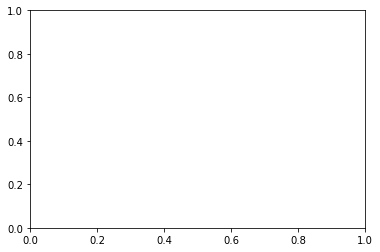

In [23]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
fig_bar, ax = plt.subplots()

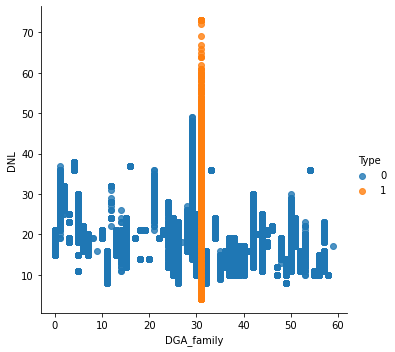

In [24]:
sns.lmplot('DGA_family', 'DNL', data=df, hue='Type', fit_reg=False)

plt.show()

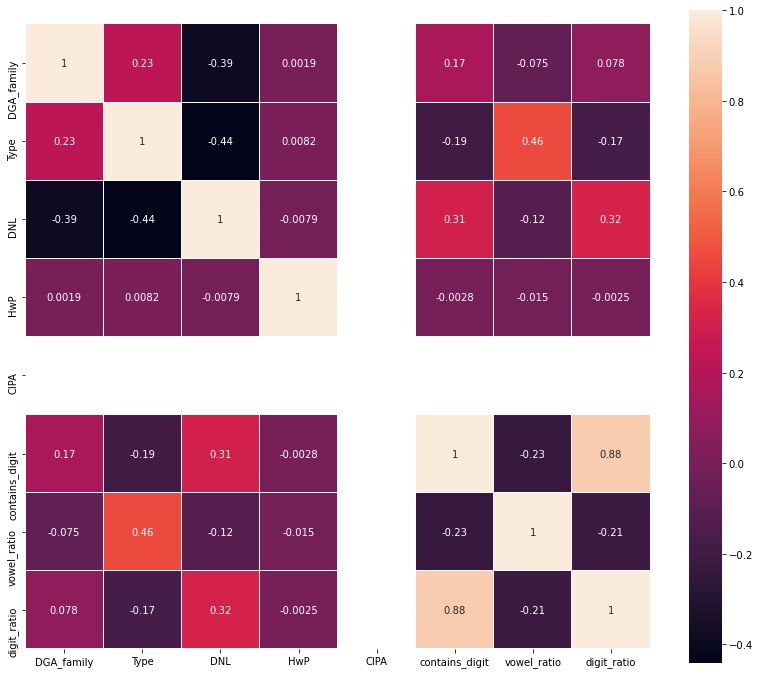

In [25]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [26]:
df.drop(columns=["CIPA"],axis=1,inplace=True)# deleting CIPA because we dont find any data in output it all is 0

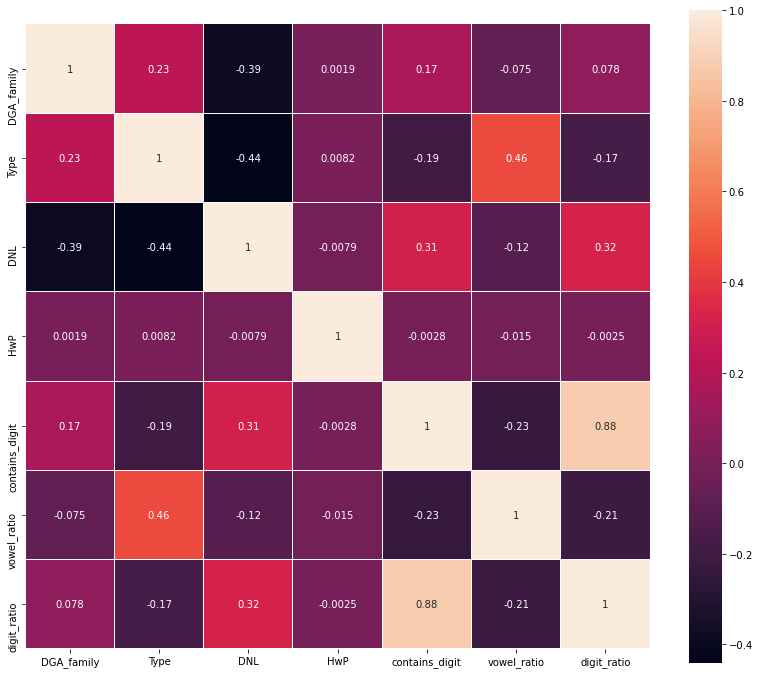

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

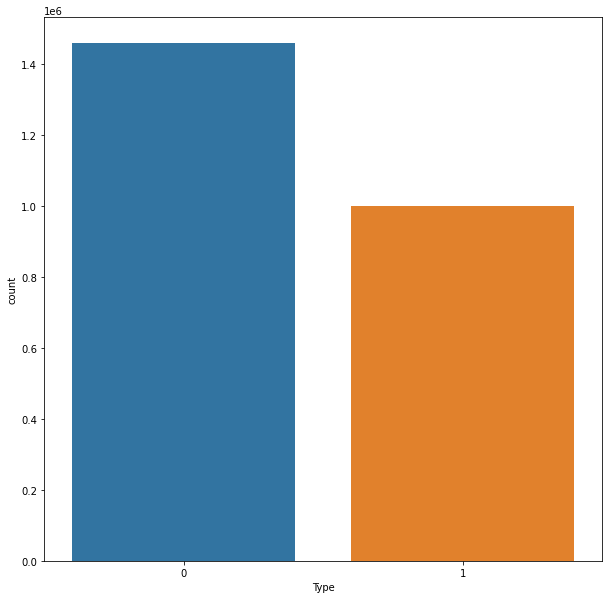

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x="Type", data=df)
plt.show()# 0 means normal ,1 means DGA

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
import numpy as np

In [31]:
X = df.drop(columns='Type',axis=1) # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y=df[["Type"]]

In [32]:
X = X.values.astype(np.float)
Y = Y.values.astype(np.float)

In [33]:
df.dropna()

,DGA_family,Type,DNL,HwP,contains_digit,vowel_ratio,digit_ratio
0,5,0,19,0,0,0.266667,0.0
1,5,0,23,0,0,0.315789,0.0
2,31,1,10,0,0,0.333333,0.0
3,31,1,25,0,1,0.333333,0.1
4,31,1,12,0,0,0.444444,0.0
...,...,...,...,...,...,...,...
2458858,5,0,21,0,0,0.294118,0.0
2458859,5,0,26,0,0,0.363636,0.0
2458860,42,0,25,0,0,0.333333,0.0
2458861,5,0,25,0,0,0.285714,0.0


In [34]:
df.fillna(df.mean(), inplace=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
import numpy as np # checking any NaN values
np.isnan(df)

,DGA_family,Type,DNL,HwP,contains_digit,vowel_ratio,digit_ratio
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2458858,False,False,False,False,False,False,False
2458859,False,False,False,False,False,False,False
2458860,False,False,False,False,False,False,False
2458861,False,False,False,False,False,False,False


In [37]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [38]:
y_pred=clf.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

In [ ]:
 precision_recall_fscore_support(y_test, y_pred, average=None,labels=[0,1])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

In [ ]:
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(matrixresult)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()